In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.000000,0.004968,0.143370,0.000000,0.000000,0.938635,0.480550,18
1,0.000443,0.003539,0.165469,0.220794,0.060606,0.945497,0.772254,40
2,0.000886,0.004556,0.100399,0.000000,0.000000,0.860134,0.557937,18
3,0.001329,0.000827,0.077330,0.129641,0.000000,0.994121,0.667010,10
4,0.001772,0.002318,0.182346,0.103005,0.010101,0.860134,0.344968,5
5,0.002215,0.003716,0.164833,0.119234,0.000000,0.870074,0.387616,3
6,0.002658,0.000137,0.029155,0.000000,0.000000,0.931638,0.814199,29
7,0.003101,0.000813,0.056125,0.112309,0.000000,0.870074,0.165778,2
8,0.003545,0.001649,0.110227,0.064135,0.020202,0.940937,0.498323,20
9,0.003988,0.000326,0.068629,0.000000,0.000000,0.885153,0.293394,3


In [3]:
X = dataset.iloc[:, [*range(0,6),7]].values
Y = dataset['guests'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 7


first_hidden_layer_size = 70
second_hidden_layer_size = 50
third_hidden_layer_size = 15
fourth_hidden_layer_size = 50
fifth_hidden_layer_size = 15


output_layer_size = 1


epochs_number = 100
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

#Третий скрытый слой, функция активации - ReLU
model.add(Dense(third_hidden_layer_size, activation='relu'))

#4 скрытый слой, функция активации - ReLU
model.add(Dense(fourth_hidden_layer_size, activation='relu'))

#5 скрытый слой, функция активации - ReLU
model.add(Dense(fifth_hidden_layer_size, activation='relu'))



# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 70)                560       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                800       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 6,456
Trainable params: 6,456
Non-trainable params: 0
____________________________________________________

In [8]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1819 samples, validate on 455 samples
Epoch 1/100
1819/1819 [==============================] - 1s 450us/step - loss: 0.2130 - mean_absolute_error: 0.2282 - mean_squared_error: 0.2130 - val_loss: 0.4264 - val_mean_absolute_error: 0.2460 - val_mean_squared_error: 0.4264
Epoch 2/100
1819/1819 [==============================] - 0s 244us/step - loss: 0.0415 - mean_absolute_error: 0.1432 - mean_squared_error: 0.0415 - val_loss: 0.0269 - val_mean_absolute_error: 0.1152 - val_mean_squared_error: 0.0269
Epoch 3/100
1819/1819 [==============================] - 0s 234us/step - loss: 0.0372 - mean_absolute_error: 0.1251 - mean_squared_error: 0.0372 - val_loss: 0.0180 - val_mean_absolute_error: 0.1042 - val_mean_squared_error: 0.0180
Epoch 4/100
1819/1819 [==============================] - 0s 260us/step - loss: 0.0185 - mean_absolute_error: 0.1069 - mean_squared_error: 0.0185 - val_loss: 0.0182 - val_mean_absolute_error: 0.1038 - val_mean_squared_error: 0.0182
Epoch 5/100
1819/1819 [======

1819/1819 [==============================] - 0s 265us/step - loss: 0.0157 - mean_absolute_error: 0.0989 - mean_squared_error: 0.0157 - val_loss: 0.0143 - val_mean_absolute_error: 0.0949 - val_mean_squared_error: 0.0143
Epoch 37/100
1819/1819 [==============================] - 0s 264us/step - loss: 0.0156 - mean_absolute_error: 0.0986 - mean_squared_error: 0.0156 - val_loss: 0.0147 - val_mean_absolute_error: 0.0936 - val_mean_squared_error: 0.0147
Epoch 38/100
1819/1819 [==============================] - 0s 247us/step - loss: 0.0157 - mean_absolute_error: 0.0991 - mean_squared_error: 0.0157 - val_loss: 0.0139 - val_mean_absolute_error: 0.0917 - val_mean_squared_error: 0.0139
Epoch 39/100
1819/1819 [==============================] - 1s 276us/step - loss: 0.0155 - mean_absolute_error: 0.0986 - mean_squared_error: 0.0155 - val_loss: 0.0145 - val_mean_absolute_error: 0.0952 - val_mean_squared_error: 0.0145
Epoch 40/100
1819/1819 [==============================] - 0s 267us/step - loss: 0.015

1819/1819 [==============================] - 0s 247us/step - loss: 0.0156 - mean_absolute_error: 0.0983 - mean_squared_error: 0.0156 - val_loss: 0.0136 - val_mean_absolute_error: 0.0913 - val_mean_squared_error: 0.0136
Epoch 72/100
1819/1819 [==============================] - 1s 277us/step - loss: 0.0151 - mean_absolute_error: 0.0972 - mean_squared_error: 0.0151 - val_loss: 0.0142 - val_mean_absolute_error: 0.0941 - val_mean_squared_error: 0.0142
Epoch 73/100
1819/1819 [==============================] - 0s 270us/step - loss: 0.0155 - mean_absolute_error: 0.0981 - mean_squared_error: 0.0155 - val_loss: 0.0145 - val_mean_absolute_error: 0.0951 - val_mean_squared_error: 0.0145
Epoch 74/100
1819/1819 [==============================] - 0s 264us/step - loss: 0.0154 - mean_absolute_error: 0.0981 - mean_squared_error: 0.0154 - val_loss: 0.0152 - val_mean_absolute_error: 0.0977 - val_mean_squared_error: 0.0152
Epoch 75/100
1819/1819 [==============================] - 0s 262us/step - loss: 0.015

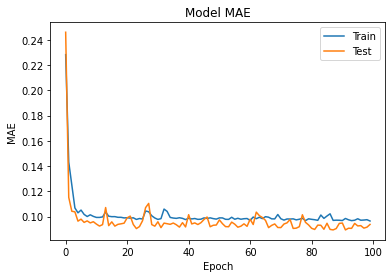

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

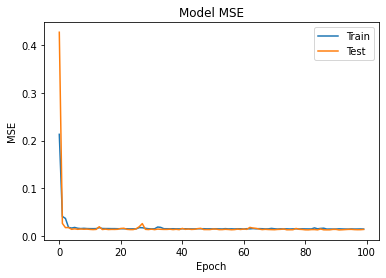

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

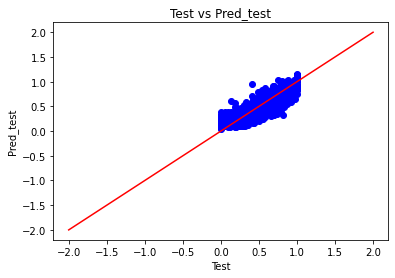

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

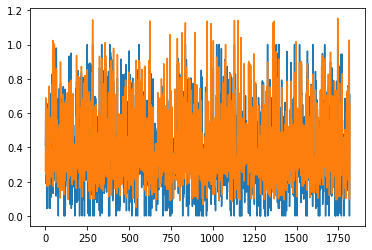

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

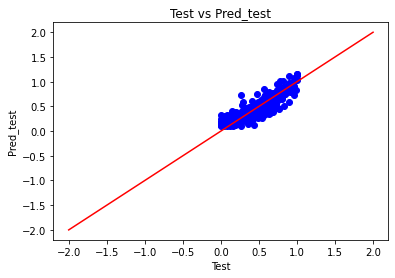

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

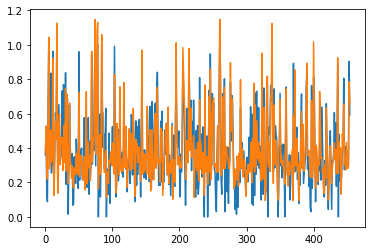

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.12170688223795038
0.11920787253166638


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9982309937477112, p = 0.04850737378001213
Test k = 0.9953963160514832, p = 0.19939783215522766


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9981389045715332, p_s = 0.010128065012395382
k_n = 12.178609608500107, p_n = 0.002266984365023487


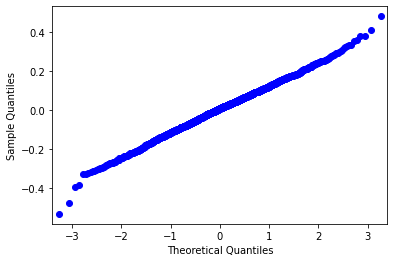

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

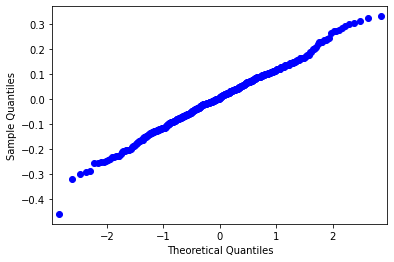

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

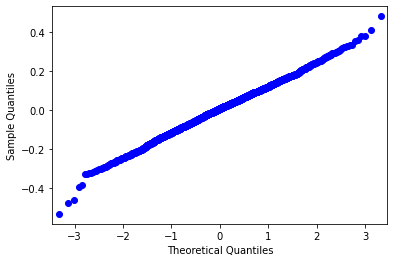

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

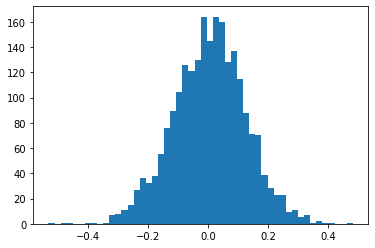

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')